## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

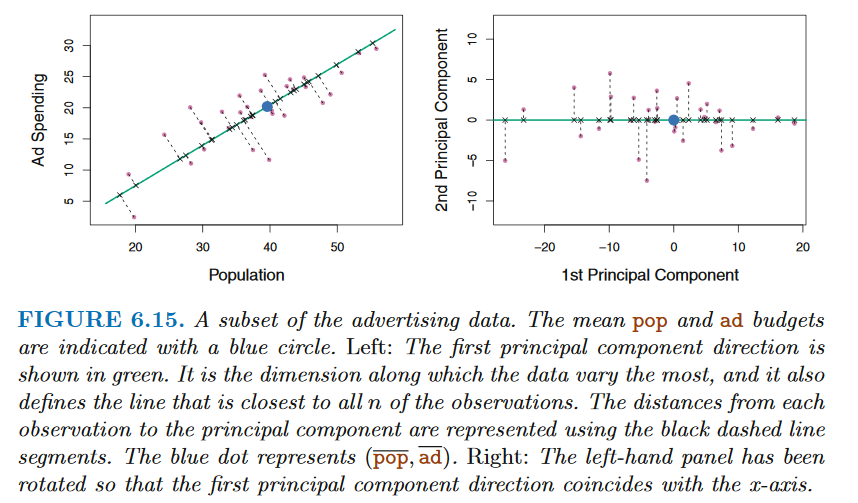

In [2]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


#### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

De esta manera se pueden construir las proyecciones de los datos $X$ en cada una de las $d$ componentes principales como:

$$z_{i1} = w_{11} x_{i1} + w_{12} x_{i2} + \cdots w_{1d} x_{id}$$
$$z_{i2} = w_{21} x_{i1} + w_{22} x_{i2} + \cdots w_{2d} x_{id}$$
$$\vdots$$
$$z_{id} = w_{d1} x_{i1} + w_{d2} x_{i2} + \cdots w_{dd} x_{id}$$

para $i=1,\cdots,n$

donde $$w_j = (w_{j1},\cdots,w_{jd}), \qquad j=1,\cdots,d$$

es el j-ésimo vector propio de la matriz de varianza empírica de $X$

de manera que $$Z_j = w_{j1} X_1 + w_{j2} X_2 + \cdots w_{jd} X_d$$ 

es la proyección de los datos en la $j-$ésima componenente principal, y se cumple que:

$$\hat{\sigma}^2(Z_1) \geq \hat{\sigma}^2(Z_2) \geq \cdots \geq \hat{\sigma}^2(Z_d)$$

**Respuesta**

Considerando como $w_1$ al primer vector propio y $w_2$ el segundo vector propio, te

$$\max_{w_{2}} \hat{\sigma}^2(Xw_2) \quad \text{s. a} \quad \|w_2\|=1, (w_2'w_2=1)\quad y \quad w_2'w_1=0 , (ortogonalidad)$$

Quedando el Lagrangiano:

$$ L = w_2' \textstyle\hat\sum w_2 + \lambda_1\left(w_2'w_2-1\right) + \lambda_2\left(w_2'w_1-0\right)$$

Derivando la ecuación anterior, para el problema de maximización se tiene:

$$ \frac{\partial L}{\partial w_2} = 2 \textstyle\hat\sum w_2 - 2\lambda_1 w_2 - \lambda_2 w_1 = 0$$

Multiplicando por la izquierda por $w_1'$, para simplificar con las condiciones establecidas se tiene:

$$ 2 w_1' \textstyle\hat\sum w_2 -2\lambda_1 w_1'w_2 - \lambda_2w_1'w_1 = 0$$ 

Aplicando la condición de ortogonalidad entre los dos primeros vectores propios, además de las condiciones de la primera iteración para el primer vector propio $w_1'w_1=1, \textstyle\hat\sum w_1 = \lambda w_1$ queda la siguiente expresión:

$$ 2 w_1' \textstyle\hat\sum w_2 = \lambda_2 $$

Desarrollando y aplicando propiedades del álgebra lineal:

$$ 2 w_2'\textstyle \hat\sum w_1 = \lambda_2 $$

$$ 2 w_2' \lambda w_1 = \lambda_2 $$

$$ 2 \lambda w_2' w_1 = \lambda_2 \rightarrow \lambda_2 = 0$$

Reemplazando en $\frac{\partial L}{\partial w_2}$:

\begin{align}
2 \textstyle\hat\sum w_2 - 2\lambda_1 w_2 &= 0 \\
\textstyle\hat\sum w_2 &= \lambda_1 w_2 
\end{align}

Así, tenemos que $w_2$ es un vector propio de $\textstyle\hat\sum$, entonces

$$ \hat\sigma^2 (Xw_2) = w_2'\textstyle\hat\sum w_2 = w_2'\lambda_1 w_2 = \lambda_1$$

Con esto, se puede concluir que la segunda dirección de máxima varianza está asociada al segundo vector propio $w_2$, cuyo valor es el segundo de mayor valor en $\lambda_1$.

En general, a i-ésima dirección esta asociada al i-ésimo vector propio, cuyo valor está asociado al i-ésimo de mayor valor en $\lambda$, siendo estos vectores todos ortogonales entre sí.

#### Ejercicio 2:
Muestre que $S$, la varianza empírica total de los datos $X$ cumple:
$$S \equiv  \sum_{j=1}^d \hat{\sigma}^2(X_j) = \sum_{j=1}^d \hat{\sigma}^2(Z_j)$$

###### Indicación:
Utilice la propiedad de la descomposición de una matriz $A$ en valores y vectores propios que establece que la traza de $A$ es igual a la suma de sus valores propios.

In [3]:
#Respuesta


#### Selección del número de componentes principales
La propiedad anterior genera un criterio para decidir el número de componentes principales a considerar en función del porcentaje de varianza explicada. En efecto, la proporción de varianza explicada (PVE) por la m-ésima componente principal se puede calcular como:
$$PVE = \frac{\hat{\sigma}^2(Z_m)}{\sum_{j=1}^d \hat{\sigma}^2(X_j)}= \frac{ \sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{ \sum_{j=1}^d \sum_{i=1}^n{x_{ij}}^2}$$

De la demostración previa se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [4]:
data("USArrests")
head(USArrests, 10)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


### Análisis Exploratorio de Datos

corrplot 0.92 loaded



     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

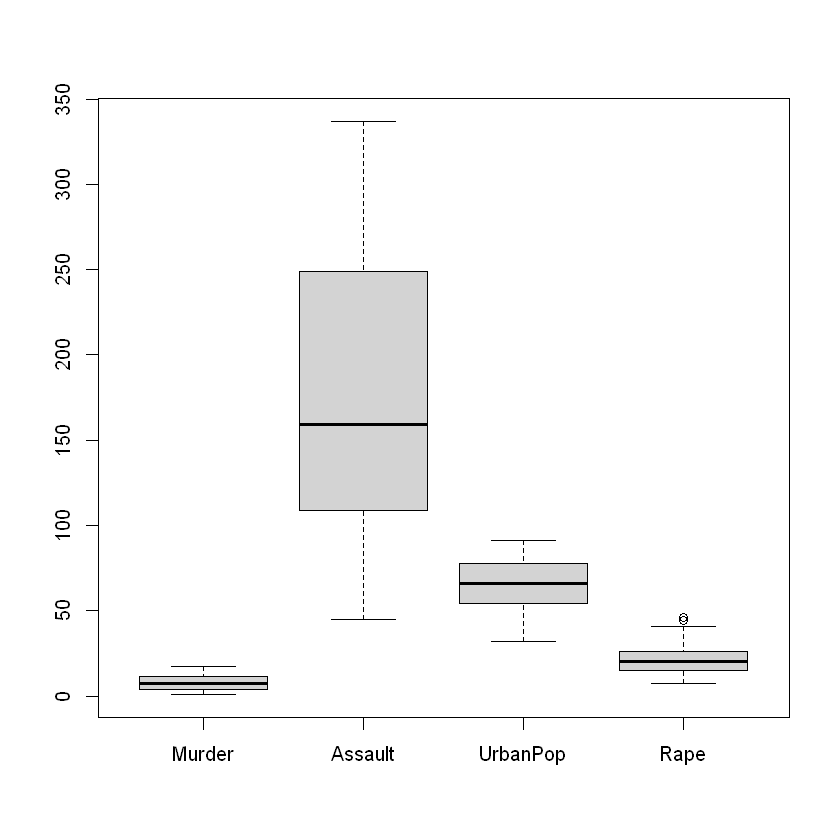

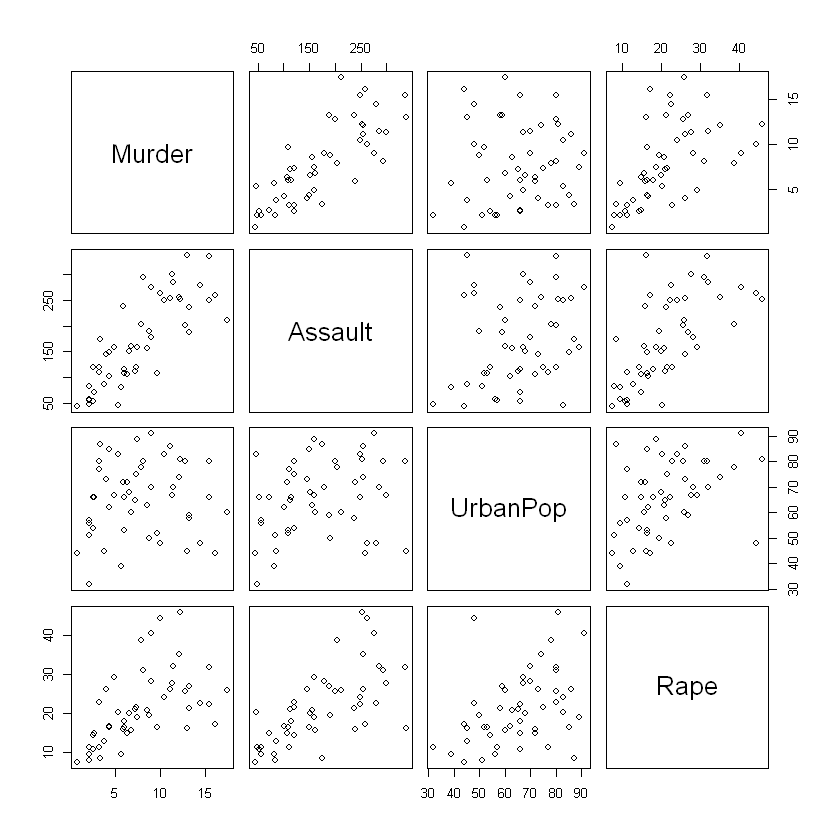

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


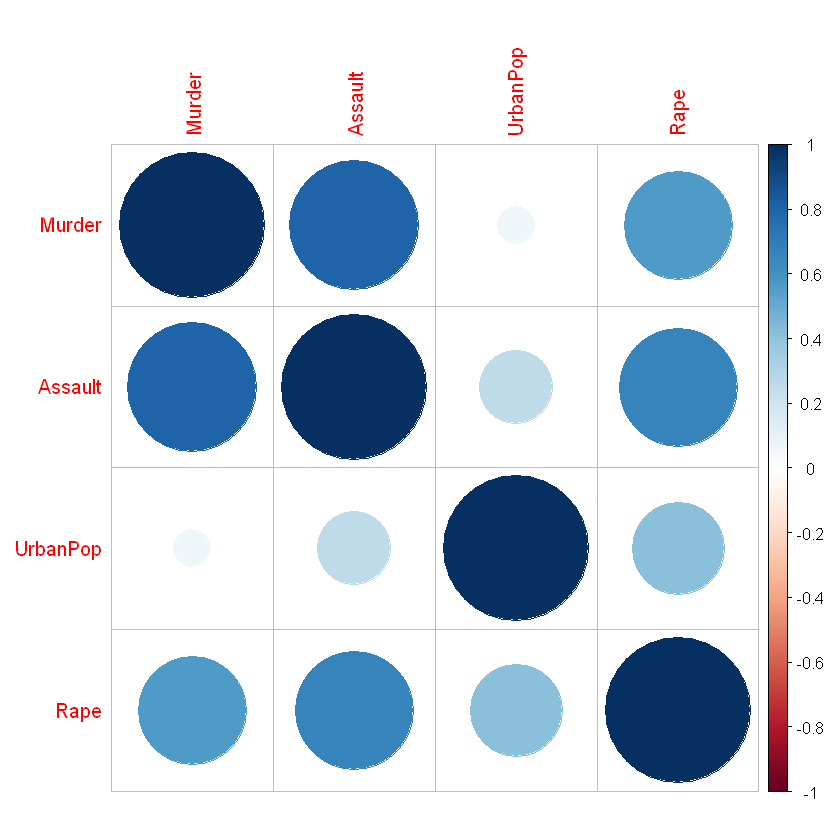

In [5]:
#install.packages('corrplot')

#Ayuda a dibujar 
library(corrplot)

# Calcula un resumen para cada columna de datos
summary(USArrests)

#gráfico para cada columna
boxplot(USArrests)

#grafico de disperción
plot(USArrests)
mcor<-cor(USArrests)

corrplot(mcor)
print(mcor)

#análisis

#corrplot
    #Por cada 100.000 -> 0.8 asesinatos
    #si la mediana y la media son cercanas quiere decir que la distribución está bastante centrada
    #si mediana < media -> existen valores muy extremos, o la distribución está concentrada en un lado

#boxplot
    #entrega la media, mediana, el primer y tercer cuartil
    #el que está más arriba ocurre más
    #si es más amplia la caja es porque los datos varían más

#Plot = grafico de dispersión
    #Si la linea es diagonal es positiva ambos datos crecen. Quiere decir que hay una relación entre los datos
    #Si la linea es diagonal negativa quiere decir que mientras un dato crece el otro decrece

#Correlaciones en numeros
    #

#Correlaciones en gráfico de circulos
    #Mientras más oscuro y grande sea el circulo es más relacionado

In [6]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

In [7]:
#Con Scaled se Escalan los datos (por varianza y media)
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)

apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, si las escalas son comparables, el escalado puede no ser deseable, como se muestra en el ejemplo siguiente:


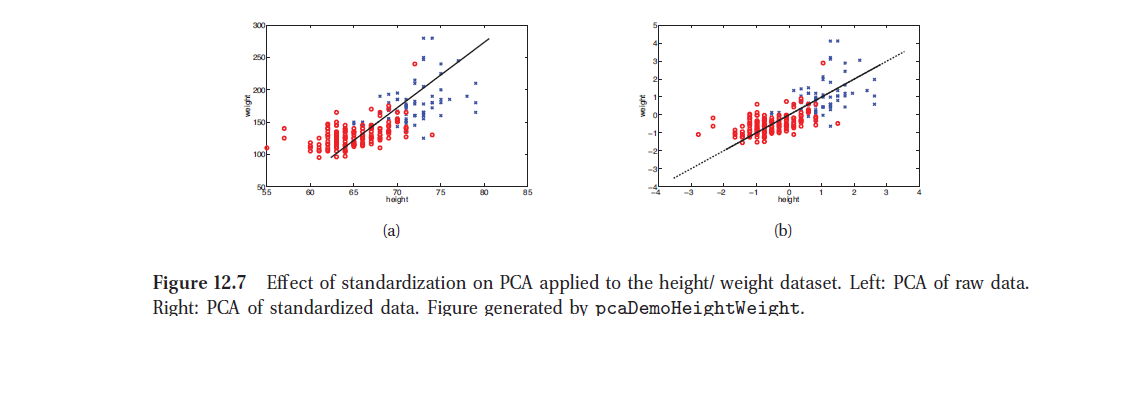

In [8]:
display_png(file="figura2.png")

#Primer grafico No escalado
#Segundo grafico escalado, la distinción y dispersión se pierde

En el caso de los datos en análisis, las variables Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, es decir se encuentran en la misma escala, no asi UrbanPop que se mide como un porcentaje de la población total. Y es por esto que hemos decidido escalar los datos.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA  dependerán de si las variables se han escalado individualmente o no.

In [9]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica

#matriz de varianzaco varianza
arrests.cov <- cov(scaled_df)

#calcula los valores y vectores propios de una matriz
arrests.eigen <- eigen(arrests.cov)

arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [10]:
# Extrayendo los pesos de los dos primeras componentes principales 

#w son los dos primeros vectores
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")

#vector propio 1 y 2
colnames(w) <- c("PC1", "PC2")

w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [11]:
# Para calcula proyección de los datos en cada componente principal matriz escalada por cada uno de los vectores
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Para efectos gráficos se crea un dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


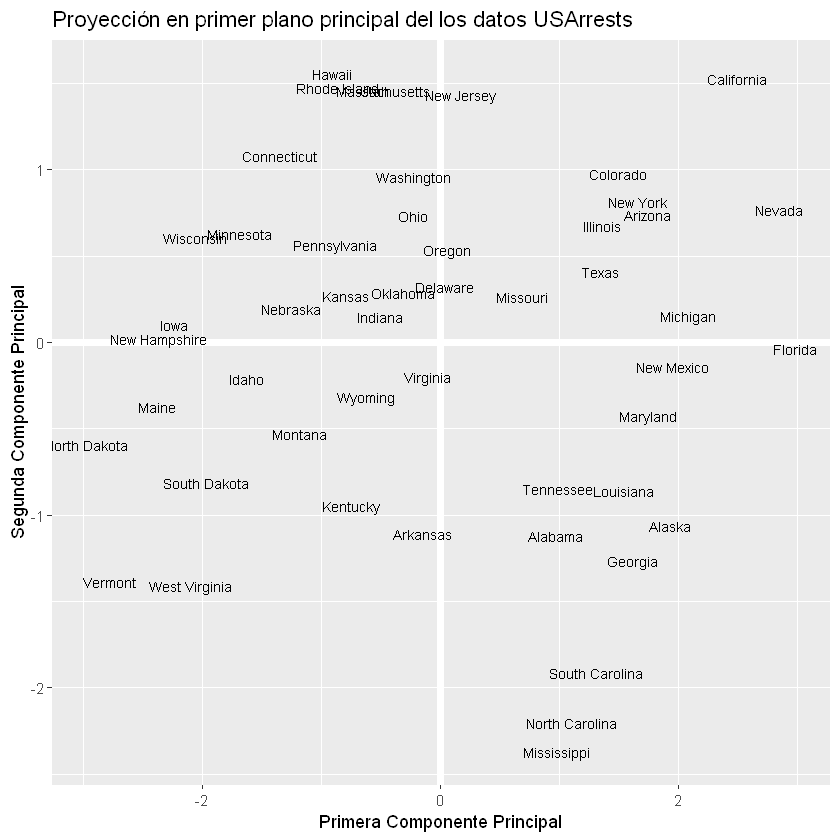

In [12]:
#install.packages('modelr')
#install.packages('ggplot2')
library(ggplot2)

# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

In [13]:
#Se puede observar que
#componente 1 lado derecho, datos positivos para murder, assault, urbanpop,rape

#California es un lugar con alta población urbana y alto de todo
#Vermont tiene poca población urbana y poco de todo

#Cuadrante inferior derecho: Baja población urbana y alto de 
#Cuadrante superior izquierco: Mayor población urbana pero menos assaltos y assesinatos, pero más violaciones

In [14]:
#Cálculo de la varianza de los valores y vectores propios
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

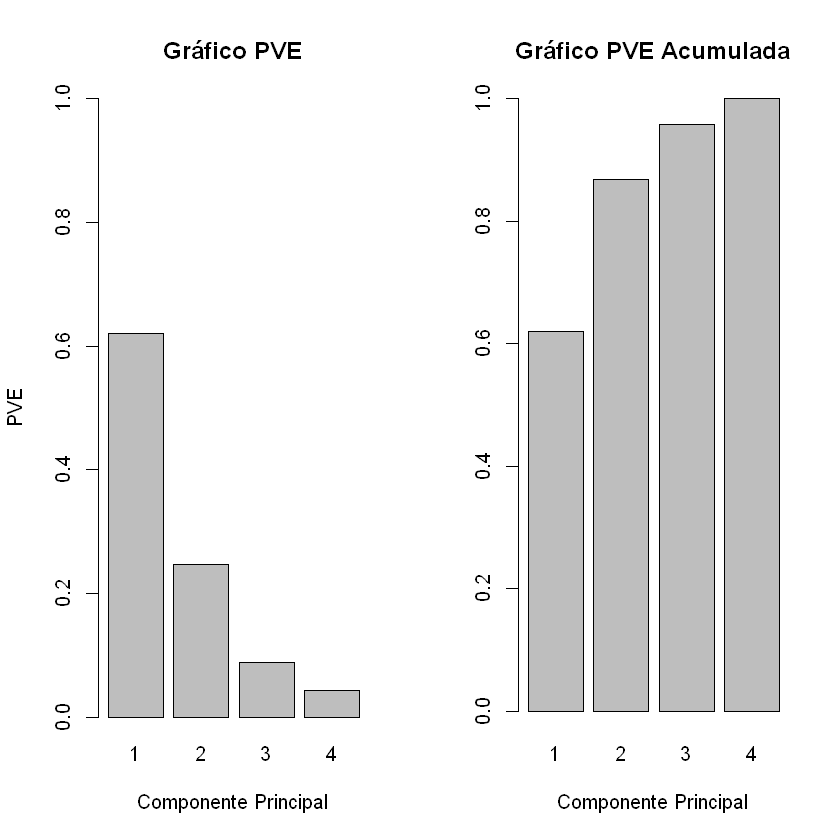

In [15]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [16]:
#Se llaman los datos para que sean escalados
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)

pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

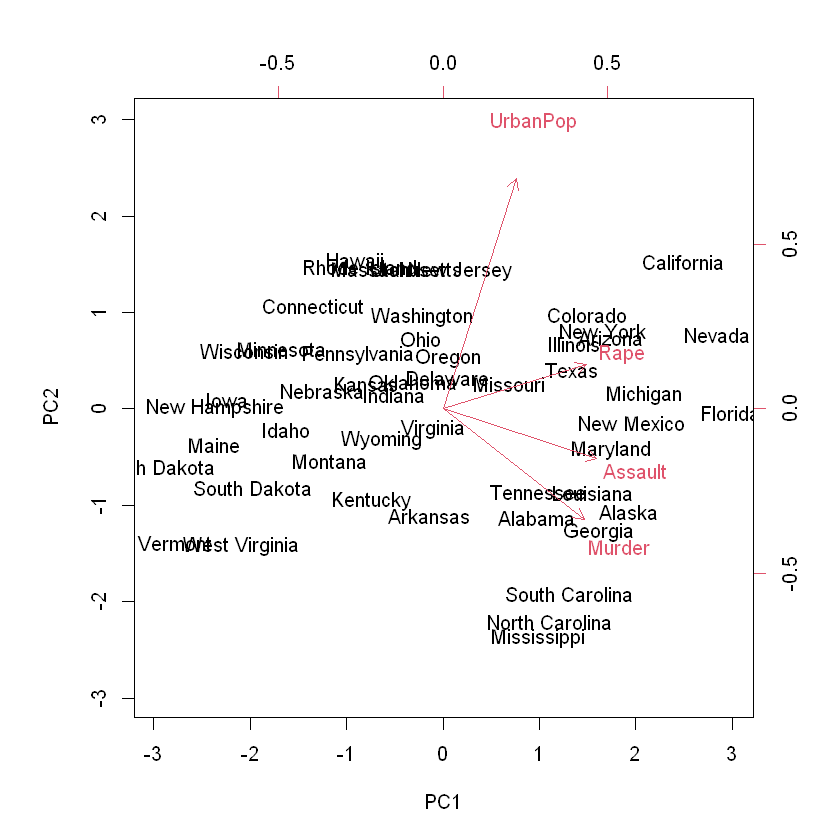

In [17]:
biplot(pca_res, scale = 0)

In [18]:
#Contribución de cada variable en los componentes principales
#En la dirección contraria a los vectores propios quiere decir que hay pocos arrestos de el caso X de ese hehco

#### Ejercicio 3:
1. Explique como se obtienen las coordenadas de  variables y observaciones en este último gráfico y como se interpreta la representación obtenida.


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


State,PC1,PC2
<chr>,<dbl>,<dbl>
Alabama,0.97566045,-1.12200121
Alaska,1.93053788,-1.06242692
Arizona,1.74544285,0.73845954
Arkansas,-0.13999894,-1.10854226
California,2.49861285,1.52742672
Colorado,1.49934074,0.97762966
Connecticut,-1.34499236,1.07798362
Delaware,0.04722981,0.32208890
Florida,2.98275967,-0.03883425


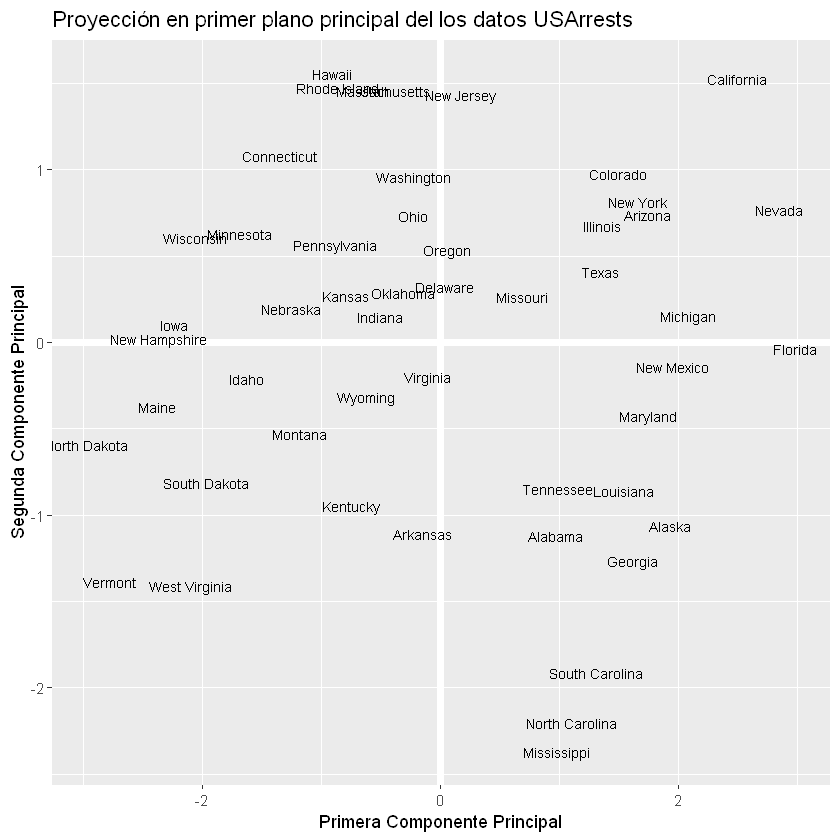

In [19]:
#Respuesta
#Las coordenadas de las variables se obtienen con:
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w

#Las coordenadas de las ciudades se obtienen con:
PC

#Y las observaciones de las ciudades se obtienen con:
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

#Análisis
#En el ultimo gráfico la dirección de los vectores rojos indican en qué sector ocurren más arrestos del hecho correspondiente.
#Por lo que en la dirección contraria se puede interpretar como que hay pocos arrestos de ese hecho.

#Por ejemplo se puede observar que en Giogia existe menor población que New York y predominan los arrestos por asesinatos
#En Virginia existe poca densidad poblacional
#En California existe una alta población y predominan los arrestos por violaciones

#Qué significa que las ciudades están cerca de otras

2. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 


In [20]:
#Respuesta
#Datos sin escalar
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen

#Datos escalados
help(prcomp)
pca_res <- prcomp(USArrests, scale = TRUE)
pca_res

#Se escalan los valores y vectores propios de la matriz de covarianzas empírica
#Las filas corresponden a los motivos de asaltos en USA
#Las columnas corresponden al lugar donde el motivo de asalto intersecta a los vectores correspondientes


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432

prcomp                  package:stats                  R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a principal components analysis on the given data matrix
     and returns the results as an object of class 'prcomp'.

_U_s_a_g_e:

     prcomp(x, ...)
     
     ## S3 method for class 'formula'
     prcomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE,
            tol = NULL, rank. = NULL, ...)
     
     ## S3 method for class 'prcomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see 'model.frame')
          containing the variables in the formula 'formula'.  By
          default the variables are taken from 'environment(

3. Utilice la función predefinida en R princomp y compare con prcomp.

In [21]:
#Respuesta
#prcomp
resultados <- prcomp(USArrests)
datos <- iris[,1:4] # Seleccionar solo las variables numéricas
resultados <- prcomp(datos, scale = TRUE) # Realizar el PCA con escalado
resultados
#princomp
resultados2 <- princomp(USArrests)
datos2 <- iris[,1:4] # Seleccionar solo las variables numéricas
resultados2 <- princomp(datos) # Realizar el PCA sin escalado
resultados2

#


Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Call:
princomp(x = datos)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
2.0494032 0.4909714 0.2787259 0.1538707 

 4  variables and  150 observations.

In [22]:
#Datos reales para ejercicio 4

[1] 100  35

,Comuna,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,S5,S6,S7,S8,S9,S10,S11,P1,E1,E2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IQUIQUE,238.7030,1.72,1961.235,0.84,81.49160,86.31254,2.13,1140.8336,16.34,...,6949,9.92,4.44,0.30,4.38,19.74,0.74,10.93,10.88373,29.65
2,ALTO HOSPICIO,185.2202,2.87,1846.297,1.14,77.13106,82.78525,3.29,878.0621,32.75,...,4978,15.32,3.19,2.41,7.76,27.55,0.67,8.83,63.36414,29.09
3,ANTOFAGASTA,224.1951,2.47,1375.518,1.03,54.05173,93.66913,2.31,1249.4364,6.44,...,13240,7.73,4.34,1.17,5.06,16.58,0.41,19.47,16.32580,25.43
4,CALAMA,816.2048,3.98,1902.088,1.18,78.97949,83.62586,4.17,1083.3625,12.69,...,4884,10.29,2.77,0.13,4.59,13.67,0.57,17.61,22.60442,28.32
5,COPIAPà,337.0193,3.92,1812.947,2.19,84.82275,86.97373,5.22,1270.2870,15.06,...,3609,7.76,2.37,2.75,6.26,23.33,0.45,25.54,36.16117,34.38
6,TIERRA AMARILLA,341.1337,7.72,2355.437,6.49,83.03797,59.28101,10.25,1576.5882,40.59,...,243,11.67,2.19,2.09,14.25,31.41,0.30,37.14,23.49085,56.45


       A1               A2              A3                 A4        
 Min.   : 171.0   Min.   :1.150   Min.   :   85.25   Min.   : 0.280  
 1st Qu.: 241.8   1st Qu.:2.877   1st Qu.: 1018.30   1st Qu.: 1.212  
 Median : 293.4   Median :3.955   Median : 1327.98   Median : 2.265  
 Mean   : 350.5   Mean   :4.448   Mean   : 1569.26   Mean   : 4.375  
 3rd Qu.: 397.0   3rd Qu.:5.747   3rd Qu.: 1885.94   3rd Qu.: 5.258  
 Max.   :1087.7   Max.   :9.880   Max.   :12088.14   Max.   :65.020  
       A5              A6                A7               A8         
 Min.   :26.21   Min.   :  1.068   Min.   : 1.250   Min.   :  367.0  
 1st Qu.:67.98   1st Qu.: 78.886   1st Qu.: 4.025   1st Qu.:  912.1  
 Median :80.39   Median : 92.159   Median : 5.190   Median : 1143.6  
 Mean   :76.05   Mean   : 85.266   Mean   : 6.378   Mean   : 1300.2  
 3rd Qu.:85.42   3rd Qu.: 99.868   3rd Qu.: 7.537   3rd Qu.: 1326.0  
 Max.   :97.09   Max.   :100.000   Max.   :18.670   Max.   :10449.5  
       A9           

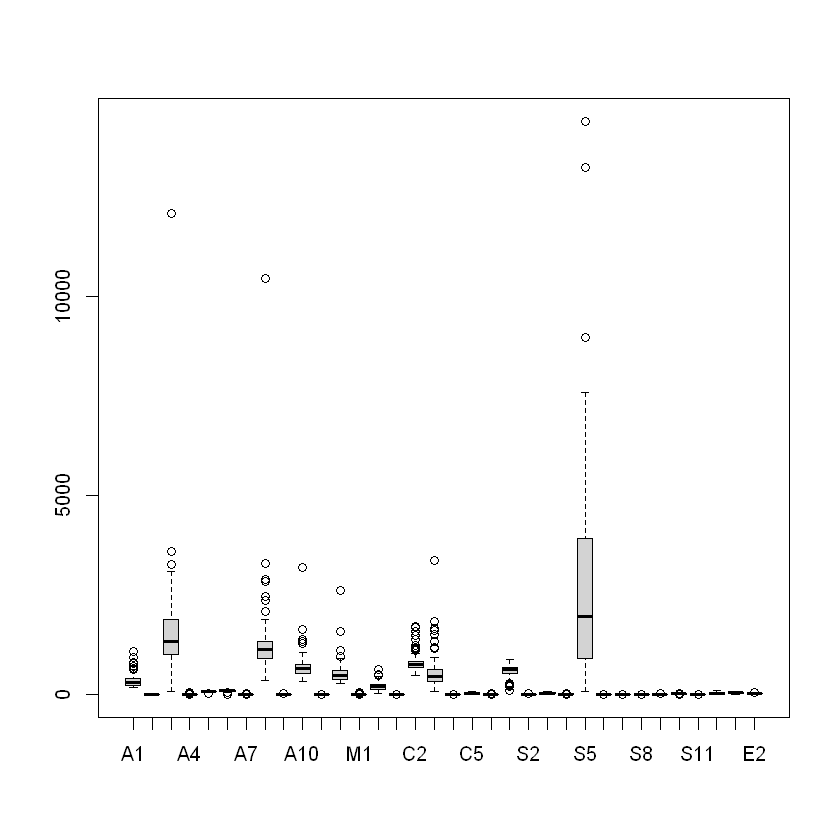

In [23]:
datos <- read.table("datosComunas.csv",sep=";",dec=",",header= TRUE)
dim(datos)
head(datos)
summary(datos[,2:35])
boxplot(datos[,2:35])

#### Ejercicio 4: 
Considere los datos de caracterización de la calidad  de vida urbana en 100 comunas de Chile, disponible en el archivo "datosComunas.csv", con la respectiva explicación de cada variable en "datosComunas.xlsx". 
1. Realice un análisis exploratorio de los datos y un primer análisis de componentes principales. Analice e interprete sus resultados.

# Análisis exploratorio de los datos

       A1               A2              A3                 A4        
 Min.   : 171.0   Min.   :1.150   Min.   :   85.25   Min.   : 0.280  
 1st Qu.: 241.8   1st Qu.:2.877   1st Qu.: 1018.30   1st Qu.: 1.212  
 Median : 293.4   Median :3.955   Median : 1327.98   Median : 2.265  
 Mean   : 350.5   Mean   :4.448   Mean   : 1569.26   Mean   : 4.375  
 3rd Qu.: 397.0   3rd Qu.:5.747   3rd Qu.: 1885.94   3rd Qu.: 5.258  
 Max.   :1087.7   Max.   :9.880   Max.   :12088.14   Max.   :65.020  
       A5              A6                A7               A8         
 Min.   :26.21   Min.   :  1.068   Min.   : 1.250   Min.   :  367.0  
 1st Qu.:67.98   1st Qu.: 78.886   1st Qu.: 4.025   1st Qu.:  912.1  
 Median :80.39   Median : 92.159   Median : 5.190   Median : 1143.6  
 Mean   :76.05   Mean   : 85.266   Mean   : 6.378   Mean   : 1300.2  
 3rd Qu.:85.42   3rd Qu.: 99.868   3rd Qu.: 7.537   3rd Qu.: 1326.0  
 Max.   :97.09   Max.   :100.000   Max.   :18.670   Max.   :10449.5  
       A9           

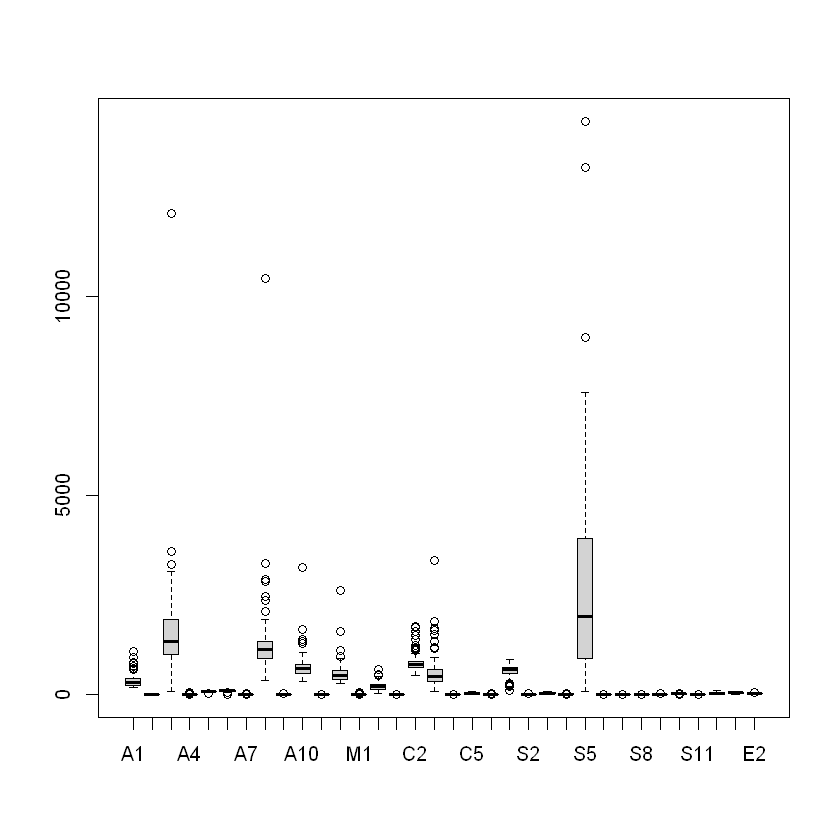

In [24]:
#Respuesta
library(corrplot)

summary(datos[,2:35])
boxplot(datos[,2:35])

### Summary
Nos mostró un resumen de los datos

### boxplot
Podemos observar qué la variable **S5** es la que tiene la mayor dispersión de datos seguido de **A3**
Sabemos también **S5** tiene más valores atipicos y qué tambien es el que más ocurrencias tiene.

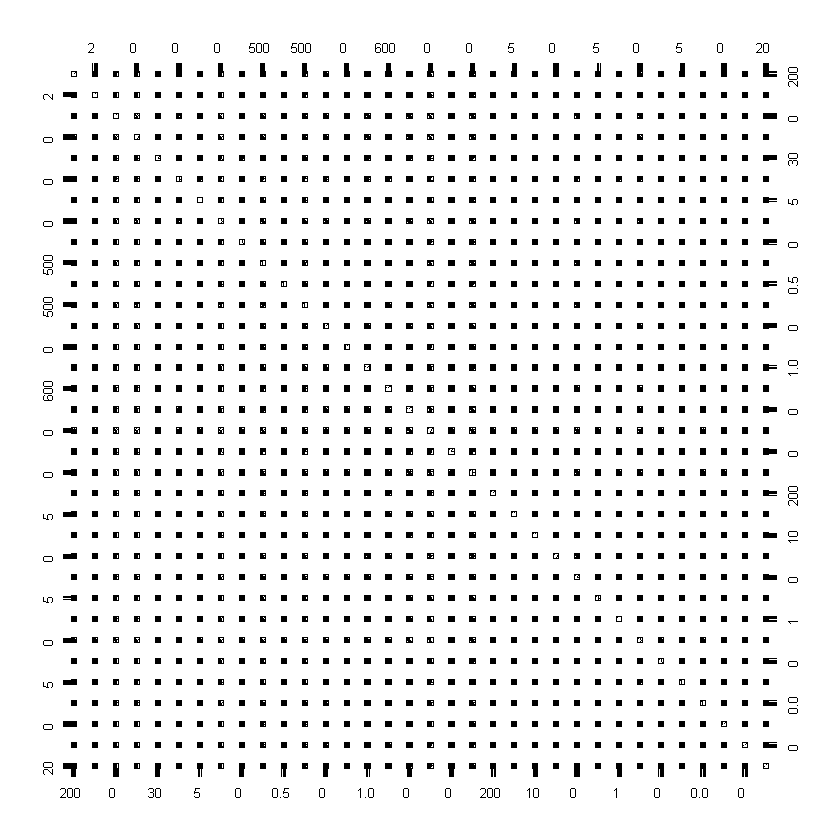

In [25]:

plot(datos[,2:35])

### Plot
No se entiende mucho porqué son demasiados datos.


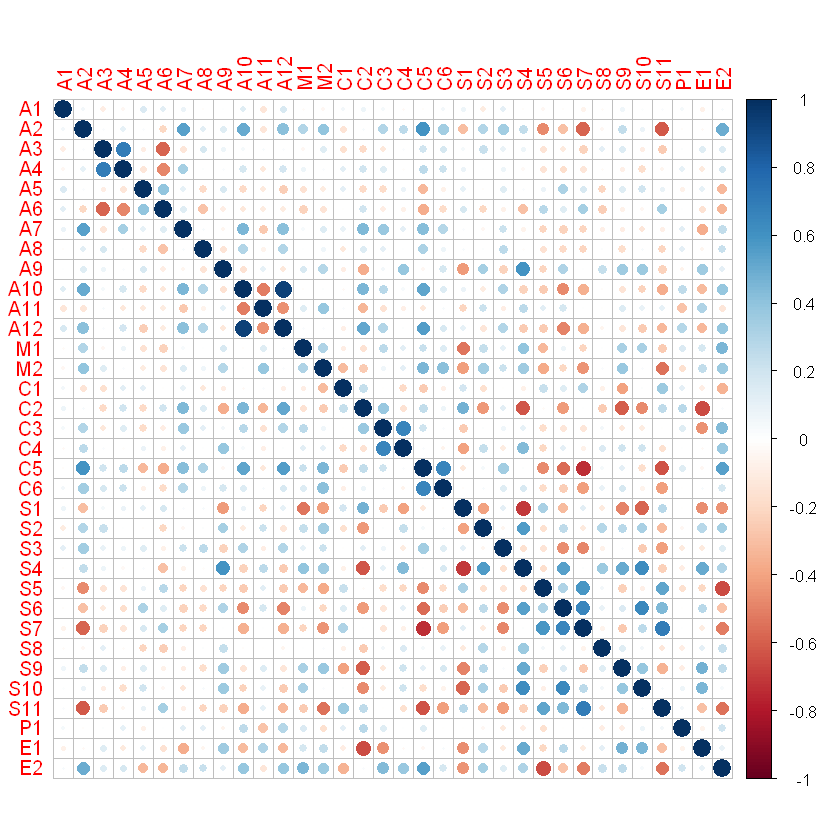

In [26]:
mcor<-cor(datos[,2:35])

corrplot(mcor)

# Corrplot
* Podemos ver que hay relación con pendiente positiva entre varios datos como **A4** con **A3** o **A12** con **A10**.
* También hay relaciones con pendiente negativa como **c5** con **S7**

# Análisis de componentes principales

In [27]:
# calcula varianzas para cada variable
datosGenerales <- datos[,2:35]
apply(datosGenerales, 2, var)
apply(datosGenerales,2,mean)

A1           A2           A3           A4           A5           A6 
2.863715e+04 3.743951e+00 1.554811e+06 5.176842e+01 2.212869e+02 4.081940e+02 
          A7           A8           A9          A10          A11          A12 
1.412406e+01 1.071246e+06 6.216228e+01 1.119189e+05 1.013222e-01 8.190493e+04 
          M1           M2           C1           C2           C3           C4 
5.547703e+01 1.417732e+04 6.348625e-02 5.332145e+04 2.008344e+05 6.462937e-01 
          C5           C6           S1           S2           S3           S4 
3.163654e+02 8.654402e+00 2.590060e+04 4.285236e+01 2.311361e+02 2.843932e+01 
          S5           S6           S7           S8           S9          S10 
6.711008e+06 7.068074e+00 1.307904e+00 5.394914e-01 1.758130e+01 4.639382e+01 
         S11           P1           E1           E2 
1.965848e-01 5.972714e+02 4.708742e+02 6.710837e+01

A1          A2          A3          A4          A5          A6 
 350.519688    4.448100 1569.255074    4.375300   76.046669   85.265539 
         A7          A8          A9         A10         A11         A12 
   6.378000 1300.189810   12.224500  686.260525    1.254800  538.423093 
         M1          M2          C1          C2          C3          C4 
   7.330164  209.856636    1.118100  810.206934  569.288210    0.280500 
         C5          C6          S1          S2          S3          S4 
  30.649500    2.043800  596.778597   11.224300   39.530100   13.932000 
         S5          S6          S7          S8          S9         S10 
2818.250000    7.313600    1.998200    0.344300    7.820300   20.424500 
        S11          P1          E1          E2 
   0.594700   34.264800   40.445321   33.970000

In [28]:
scaled_df_ciudades <- apply(datosGenerales, 2, scale)
head(scaled_df_ciudades)
apply(scaled_df_ciudades, 2, var)

apply(scaled_df_ciudades, 2, mean)

A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,S5,S6,S7,S8,S9,S10,S11,P1,E1,E2
-0.66075669,-1.4099224,0.3143588,-0.4913532,0.36602798,0.05182217,-1.1303287,-0.15396584,0.52198633,-0.52509418,...,1.5945386,0.9803712,2.1351195,-0.06031307,-0.82048524,-0.1004947,0.32771075,-0.9548128,-1.3623083,-0.52734568
-0.97680206,-0.8155854,0.2221806,-0.4496578,0.07289672,-0.12276343,-0.8216702,-0.40784892,2.60333625,-0.32123461,...,0.8336996,3.0115269,1.0421146,2.81238632,-0.01438109,1.0461291,0.16983221,-1.0407406,1.0561847,-0.59570531
-0.74648817,-1.0223113,-0.1553721,-0.4649461,-1.47858031,0.41594088,-1.0824334,-0.04903665,-0.73367268,0.08902166,...,4.0229698,0.1566247,2.0476791,1.12416488,-0.65831044,-0.5644296,-0.41657382,-0.6053733,-1.1115174,-1.04248429
2.75186687,-0.2419210,0.2669237,-0.4440984,0.19715502,-0.08115695,-0.5875155,-0.20949298,0.05904134,-0.02750092,...,0.7974140,1.1195429,0.6748650,-0.29176279,-0.77040185,-0.9916608,-0.05570857,-0.6814807,-0.8221753,-0.68969980
-0.07977783,-0.2729299,0.1954348,-0.3037236,0.58996012,0.08454777,-0.3081263,-0.02889130,0.35963849,-0.04266417,...,0.3052427,0.1679089,0.3251034,3.27528575,-0.37211962,0.4265705,-0.32635751,-0.3570012,-0.1974298,0.05004901
-0.05546422,1.6909663,0.6304985,0.2939113,0.46998115,-1.28612004,1.0302808,0.26704896,3.59771671,0.10259984,...,-0.9940896,1.6386161,0.1677107,2.37671627,1.53343428,1.6128343,-0.66466868,0.1176474,-0.7813251,2.74415069


A1  A2  A3  A4  A5  A6  A7  A8  A9 A10 A11 A12  M1  M2  C1  C2  C3  C4  C5  C6 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 S1  S2  S3  S4  S5  S6  S7  S8  S9 S10 S11  P1  E1  E2 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1

A1            A2            A3            A4            A5 
 3.269520e-17 -7.952406e-17  7.168514e-17 -3.348938e-17 -2.780019e-16 
           A6            A7            A8            A9           A10 
-3.176561e-16 -2.532778e-17 -7.338477e-17 -9.048318e-17 -1.525223e-16 
          A11           A12            M1            M2            C1 
 2.540806e-16 -1.676788e-16 -6.288373e-17 -1.171047e-16 -3.092643e-16 
           C2            C3            C4            C5            C6 
 2.527709e-17 -3.781697e-17 -1.706426e-17  2.109207e-17 -2.421457e-17 
           S1            S2            S3            S4            S5 
 3.085574e-16  7.062052e-17  1.762961e-16 -8.232943e-17 -1.369564e-17 
           S6            S7            S8            S9           S10 
-4.326075e-17  5.323650e-17  5.339696e-19  9.657639e-17 -2.548569e-16 
          S11            P1            E1            E2 
-8.031770e-18 -4.010030e-17 -1.146915e-16  1.451270e-16

In [29]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica

#matriz de varianzaco varianza
comunas.cov <- cov(scaled_df_ciudades)

#calcula los valores y vectores propios de una matriz
comunas.eigen <- eigen(comunas.cov)

comunas.eigen


eigen() decomposition
$values
 [1] 6.90747322 6.06544020 2.73934946 2.20561339 1.66559709 1.58343291
 [7] 1.45754188 1.20340241 1.17656684 0.99908077 0.88833553 0.84358915
[13] 0.77225760 0.73811235 0.62813491 0.54119238 0.53330994 0.39634256
[19] 0.31829717 0.30300719 0.29559603 0.27003368 0.23406843 0.21346321
[25] 0.17317984 0.16582370 0.14541212 0.11984329 0.11004553 0.09447808
[31] 0.06637336 0.05994207 0.05088033 0.03478336

$vectors
              [,1]         [,2]        [,3]          [,4]         [,5]
 [1,] -0.011020637 -0.044097235  0.10023080 -0.1715796564  0.202022332
 [2,] -0.287112762 -0.005429918  0.12147264 -0.1742010236  0.124020399
 [3,] -0.110839994  0.033417005 -0.28872223  0.3695753721  0.297542898
 [4,] -0.109917392 -0.079684874 -0.08958601  0.3982765617  0.387229740
 [5,]  0.104114063  0.060240011  0.08801785 -0.3340000670  0.435533177
 [6,]  0.174954874 -0.061149376  0.18428095 -0.4328412872 -0.051661772
 [7,] -0.147897599 -0.157080941  0.24539683 -0.1003117279  

In [30]:
w <- -comunas.eigen$vectors[,1:2] 
row.names(w) <- colnames(datosGenerales) #c("Murder", "Assault", "UrbanPop", "Rape")

#vector propio 1 y 2
colnames(w) <- c("PC1", "PC2")

w

,PC1,PC2
A1,0.011020637,0.044097235
A2,0.287112762,0.005429918
A3,0.110839994,-0.033417005
A4,0.109917392,0.079684874
A5,-0.104114063,-0.060240011
A6,-0.174954874,0.061149376
A7,0.147897599,0.157080941
A8,0.118425190,0.076413491
A9,0.070154481,-0.237412773
A10,0.208874946,0.228779313


In [31]:
# Para calcula proyección de los datos en cada componente principal matriz escalada por cada uno de los vectores
PC1 <- as.matrix(scaled_df_ciudades) %*% w[,1]
PC2 <- as.matrix(scaled_df_ciudades) %*% w[,2]

# Para efectos gráficos se crea un dataframe con la proyección
PC <- data.frame(Comuna = datos[,1], PC1, PC2)
head(PC)

,Comuna,PC1,PC2
,<chr>,<dbl>,<dbl>
1,IQUIQUE,-3.8497336,-0.5726486
2,ALTO HOSPICIO,-2.2299458,-4.6990033
3,ANTOFAGASTA,-3.3463336,0.5224148
4,CALAMA,-1.6754996,0.1437665
5,COPIAPà,-0.2547953,-1.1503511
6,TIERRA AMARILLA,5.0180812,-5.9080248


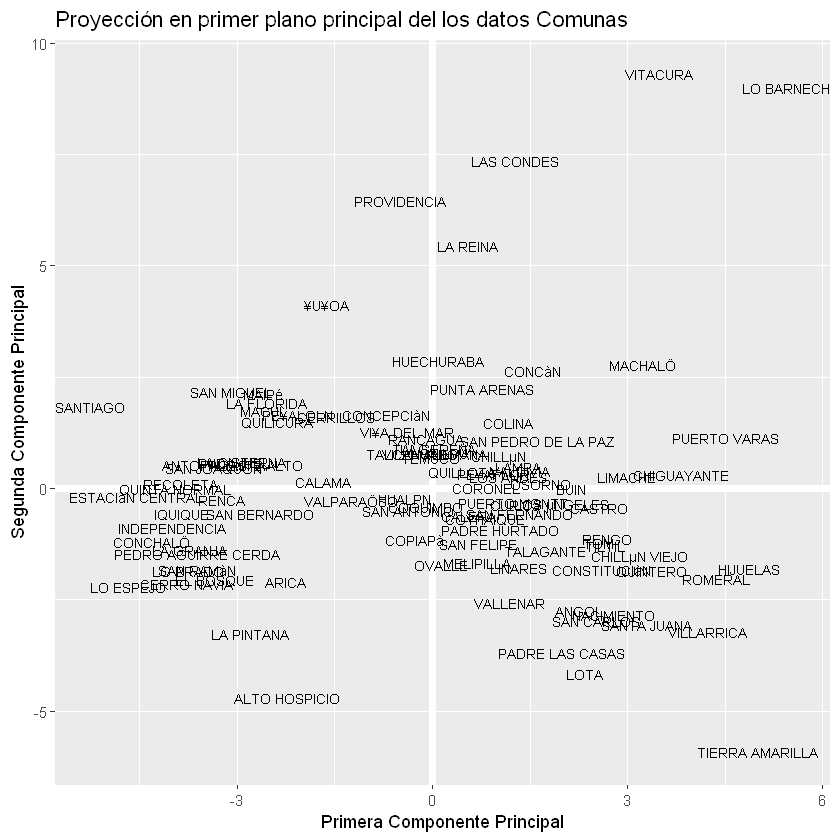

In [32]:
#install.packages('modelr')
#install.packages('ggplot2')
library(ggplot2)

# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = Comuna), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos Comunas")

In [33]:
PVE <- comunas.eigen$values / sum(comunas.eigen$values)
round(PVE, 2)

[1] 0.20 0.18 0.08 0.06 0.05 0.05 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02
[16] 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00
[31] 0.00 0.00 0.00 0.00

2. Filtre los datos para analizar un grupo específico de comunas (al menos 30), o bien un conjunto específico de variables (al menos 10). Realice un nuevo Análisis de Componentes Principales para estos datos. Analice e interprete sus resultados.

In [34]:
#Respuesta